In [8]:
import jupyterconfig
import matplotlib.pyplot as plt
import dbtools as dbt
import datetime
import seaborn as sns

sns.set()
%matplotlib inline

In [57]:
rdt_q  = """
SELECT * FROM tweetcounts
WHERE "user" = 'realDonaldTrump'
"""

tweets = dbt.select(rdt_q, con=dbt.PI_PROD)
tweets['prevt'] = tweets['tweets'].shift(1)
tweets = tweets[tweets['tweets']!=tweets['prevt']]
tweets['tweets'] -= tweets['tweets'].min()
tweets['tweets'] += 1
tweets = tweets.reset_index(drop=True)
tweets['date'] = tweets['update_ts'].map(
    lambda x: x.to_pydatetime().date())
tweets['wd'] = tweets['date'].map(lambda x: '{:%a}'.format(x))
tweets.tail()

,update_ts,user,tweets,prevt,date,wd
775,2020-02-12 17:20:54.888318,realDonaldTrump,605,48978.0,2020-02-12,Wed
776,2020-02-12 18:24:16.447802,realDonaldTrump,606,48979.0,2020-02-12,Wed
777,2020-02-12 18:25:16.732173,realDonaldTrump,605,48980.0,2020-02-12,Wed
778,2020-02-12 20:24:51.498994,realDonaldTrump,606,48979.0,2020-02-12,Wed
779,2020-02-12 20:25:57.089653,realDonaldTrump,605,48980.0,2020-02-12,Wed


In [58]:
tweet_count = tweets['tweets'].max() - tweets['tweets'].min()
day_count = (tweets['date'].max() - tweets['date'].min()).days
tpd = tweet_count / days
print(f'Tweets: {tweet_count}')
print(f'Days: {day_count}')
print(f'Tweet Rate: {tpd:.1f}')

Tweets: 605
Days: 16
Tweet Rate: 37.8


(array([737453., 737455., 737456., 737458., 737460., 737462., 737464.,
        737466., 737468.]), <a list of 9 Text xticklabel objects>)

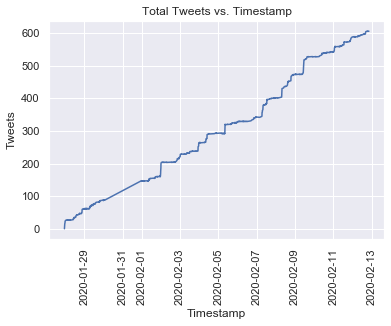

In [64]:
plt.figure()
plt.plot(tweets['update_ts'], tweets['tweets'])
plt.title('Total Tweets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Tweets')
plt.xticks(rotation=90)

In [73]:
date_group = tweets.groupby('date')
date_stats = date_group[['tweets', 'wd']].nth(-1)
date_stats = date_stats.reset_index()
date_stats['chg'] = date_stats['tweets'] - date_stats['tweets'].shift(1)
date_stats.tail()

,date,tweets,wd,chg
12,2020-02-08,473,Sat,72.0
13,2020-02-09,527,Sun,54.0
14,2020-02-10,542,Mon,15.0
15,2020-02-11,588,Tue,46.0
16,2020-02-12,605,Wed,17.0


(array([737451., 737453., 737455., 737456., 737458., 737460., 737462.,
        737464., 737466.]), <a list of 9 Text xticklabel objects>)

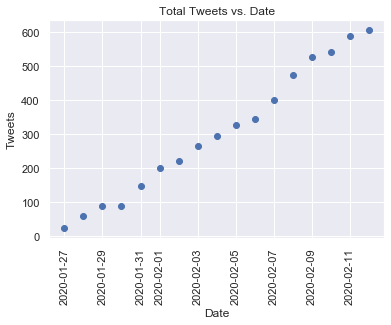

In [72]:
plt.figure()
plt.plot(date_stats['date'], date_stats['tweets'], 'o')
plt.title('Total Tweets vs. Date')
plt.xlabel('Date')
plt.ylabel('Tweets')
plt.xticks(rotation=90)

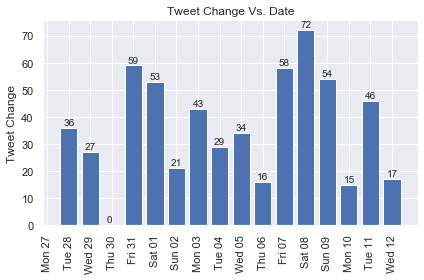

In [100]:
plt.figure()
tick_labels = ['{:%a %d}'.format(x)
               for x in date_stats['date'].tolist()]
plt.bar(date_stats['date'].index,
        date_stats['chg'],
        tick_label=tick_labels)
plt.xticks(rotation=90)
for i,r in date_stats.iterrows():
    plt.annotate('{:,.0f}'.format(r['chg']),
                 (i - 0.25, r['chg'] + 1))
plt.title('Tweet Change Vs. Date')
plt.ylabel('Tweet Change')
plt.tight_layout()